In [1]:
import numpy as np
import math as m
import cmath as c
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
L=[]
for i in range(0,7):
    L.append(i)
L

[0, 1, 2, 3, 4, 5, 6]

### DFT

In [3]:
def DFT_matrix(N):
    W=c.exp(((-2*m.pi)/N)*1j)
    D=[]
    for i in range(N):
        d=[]
        for j in range(N):
            d.append(W**(i*j))
        D.append(d)
    return D

In [4]:
def IDFT_matrix(N):
    W1=c.exp(((2*m.pi)/N)*1j)
    D1=[]
    for i in range(N):
        d1=[]
        for j in range(N):
            d1.append(W1**(i*j))
        D1.append(d1)
    return D1

In [5]:
def DFT(x,D):
    X=np.matmul(D,x)
    return X

In [6]:
def IDFT(X,D1):
    x=np.matmul(D1,X)
    N=len(X)
    x=np.divide(x,N)
    return x

In [7]:
def X_m1(X,L):
    Xm1=[]
    N=len(X)
    for i in range(N):
        if i<=int((N-1-L)/2):
            Xm1.append(X[i])
        elif i>=int((N+1-L)/2) and i<=int((N-1+L)/2):
            Xm1.append(0)
        elif i>=int((N+1+L)/2) and i<=N-1:
            Xm1.append(X[i])
    return Xm1

### DCT

In [8]:
def DCT_matrix(N):
    D1=[]
    for k in range(N):
        d=[]
        for n in range(N):
            d.append(np.cos(((m.pi)*k*(2*n+1))/(2*N)))
        D1.append(d)
    return D1

In [9]:
def DCT(x,D1):
    X1=np.matmul(D1,x)
    X1=np.multiply(X1,2)
    return X1

In [10]:
def IDCT_matrix(N):
    D=[]
    for n in range(N):
        d=[]
        for k in range(N):
            d.append(np.cos(((m.pi)*k*(2*n+1))/(2*N)))
        D.append(d)
    return D

In [11]:
def IDCT(D,X1):
    X=[]
    a=[]
    a.append(0.5)
    for i in range(N-1):
        a.append(1)
    for i in range(N):
        X.append(X1[i]*a[i])
    x=np.matmul(D,X)
    x=np.divide(x,N)
    return x

In [12]:
def X_m2(X,L):
    N=len(X)
    Xm2=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm2.append(X[i])
        else:
            Xm2.append(0)
    return Xm2

### Haar

In [13]:
def identity_matrix(n):
    I=[]
    for i in range(n):
        k=[]
        for j in range(n):
            if i==j:
                k.append(1)
            else:
                k.append(0)
        I.append(k)
    return I

In [14]:
def haar_matrix(H,N):
    D=[]
    for i in range(N):
        d=[]
        for j in range(N):
            d.append(H[i][j])
            d.append(H[i][j])
        D.append(d)
    I=identity_matrix(N)
    N1=N**0.5
    D1=[]
    for i in range(N):
        d=[]
        for j in range(N):
            if I[i][j]!=0:
                d.append(N1*I[i][j])
                d.append(-N1*I[i][j])
            else:
                d.append(0)
                d.append(0)
        D1.append(d)
    D=D+D1
    return D

In [15]:
def v(N):
    i=0
    while N!=1:
        N=N/2
        i=i+1
    return i

In [16]:
def H_(N):
    h=[]
    h.append(1)
    h.append([[1,1],[1,-1]])
    k=v(N)
    for i in range(1,k):
        D=haar_matrix(h[i],2**i)
        h.append(D)
    return h[k]

In [17]:
def HT(H,x):
    X=np.matmul(H,x)
    return X

In [18]:
def IHT(H,X):
    N=len(X)
    k=np.array(H)
    H1=k.transpose()
    x=np.matmul(H1,X)
    x=np.divide(x,N)
    return x

In [19]:
def X_m3(X,L):
    N=len(X)
    Xm3=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm3.append(X[i])
        else:
            Xm3.append(0)
    return Xm3

### error

In [20]:
def error(x,xm3):
    x=np.array(x)
    xm3=np.array(xm3)
    E3=np.mean((abs(x-xm3))**2)
    return E3

### Main

In [21]:
N=64
E1=[0]*7
E2=[0]*7
E3=[0]*7
D=DFT_matrix(N)
D1=IDFT_matrix(N)
C=DCT_matrix(N)
H=H_(N)
Z=50
for z in range(Z):
    x=np.random.randint(100,size=N)
    X1=DFT(x,D)
    for i in range(0,7):
        k=L[i]
        Xm1=X_m1(X1,k)
        xm1=IDFT(Xm1,D1)
        e=error(x,xm1)
        E1[i]=E1[i]+e

    X2=DCT(x,C)
    C1=IDCT_matrix(N)
    for i in range(0,7):
        k=L[i]
        Xm2=X_m2(X2,k)
        xm2=IDCT(C1,Xm2)
        e=error(x,xm2)
        E2[i]=E2[i]+e

    X3=HT(H,x)
    for i in range(0,7):
        k=L[i]
        Xm3=X_m3(X3,k)
        xm3=IHT(H,Xm3)
        e=error(x,xm3)
        E3[i]=E3[i]+e
        
E1=np.multiply(E1,Z)
E2=np.multiply(E2,Z)
E3=np.multiply(E3,Z)

In [22]:
E1

array([4.90065170e-22, 3.08891968e+04, 6.98057318e+04, 1.08722267e+05,
       1.37760532e+05, 1.66798797e+05, 2.04624091e+05])

In [23]:
E2

array([1.73970856e-22, 3.21824827e+04, 7.76081012e+04, 1.01578340e+05,
       1.31585081e+05, 1.68333812e+05, 2.06283166e+05])

In [24]:
E3

array([3.80375642e-26, 2.75113281e+04, 6.61222656e+04, 1.00376562e+05,
       1.34294531e+05, 1.68253125e+05, 1.98600391e+05])

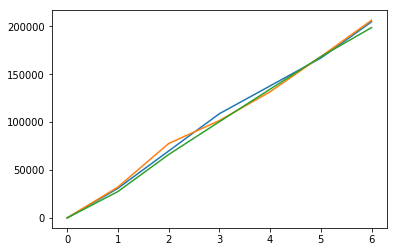

In [25]:
plt.plot(E1)
plt.plot(E2)
plt.plot(E3)